### Object : Abstractive summarization & Extractive summarization

In [ ]:
from importlib.metadata import version
import nltk
import tensorflow
import summa
import pandas as pd

print(nltk.__version__)
print(tensorflow.__version__)
print(pd.__version__)
print(version('summa'))

### 1. 데이터 수집

In [46]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [55]:
data.head(55)

,headlines,text
0,upGrad learner switches to career in ML & Al with 90% salary hike,"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers."
1,Delhi techie wins free food from Swiggy for one year on CRED,"Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more."
2,New Zealand end Rohit Sharma-led India's 12-match winning streak,"New Zealand defeated India by 8 wickets in the fourth ODI at Hamilton on Thursday to win their first match of the five-match ODI series. India lost an international match under Rohit Sharma's captaincy after 12 consecutive victories dating back to March 2018. The match witnessed India getting all out for 92, their seventh lowest total in ODI cricket history."
3,Aegon life iTerm insurance plan helps customers save tax,"With Aegon Life iTerm Insurance plan, customers can enjoy tax benefits on your premiums paid and save up to Ã¢ÂÂ¹46,800^ on taxes. The plan provides life cover up to the age of 100 years. Also, customers have options to insure against Critical Illnesses, Disability and Accidental Death Benefit Rider with a life cover up to the age of 80 years."
4,"Have known Hirani for yrs, what if MeToo claims are not true: Sonam","Speaking about the sexual harassment allegations against Rajkumar Hirani, Sonam Kapoor said, ""I've known Hirani for many years...What if it's not true, the [#MeToo] movement will get derailed."" ""In the #MeToo movement, I always believe a woman. But in this case, we need to reserve our judgment,"" she added. Hirani has been accused by an assistant who worked in 'Sanju'."
...,...,...
50,Yashwant Sinha demands probe into alleged fund diversion by DHFL,"Former Finance Minister Yashwant Sinha on Tuesday demanded a probe into the alleged diversion of loans worth Ã¢ÂÂ¹31,000 crore by Dewan Housing Finance (DHFL). All agencies including regulators of the government have failed to track nefarious deals, he said. This comes after a media report on Tuesday accused DHFL's controlling shareholders of diverting funds to shell companies to buy assets."
51,Boeing sales cross $100bn for 1st time in its 102-yr history,"US-based Boeing on Wednesday reported annual sales worth $101.12 billion in 2018, the first time the planemaker's sales crossed the $100-billion mark in its 102-year history. The company said it expects to deliver between 895 and 905 commercial aircraft in 2019. Boeing retained its position as the world's largest planemaker for the seventh straight year, delivering 806 aircraft in 2018."
52,headlines,text
53,OnePlus named bestselling premium smartphone brand of 2018: Report,"OnePlus has emerged as India's best-selling premium smartphone brand of 2018, as per a report by Counterpoint. It captured 36% of the market share in the premium segment, in Q4 2018. Further, its OnePlus 6 emerged as the highest selling premium smartphone of 2018 followed by OnePlus 6T."


### 2. 데이터 전처리 (추상적 요약)
실습에서 사용된 전처리를 참고하여 각자 필요하다고 생각하는 전처리를 추가 사용하여 텍스트를 정규화 또는 정제해 보세요.   
만약, 불용어 제거를 선택한다면 상대적으로 길이가 짧은 요약 데이터에 대해서도 불용어를 제거하는 것이 좋을지 고민해 보세요.

#### 중복 데이터 처리

In [48]:
# 전체 샘플수
len(data)

98401

In [49]:
# headlines 열에서 중복을 배제한 유일한 샘플 수
print(data['headlines'].nunique())

# text 열에서 중복을 배제한 유일한 샘플 수
print(data['text'].nunique())

98280
98360


headline이 text 내용을 요약한 것이긴 하지만 그렇다고 서로 다른 내용의 기사의 헤드라인이 중복 됐다는 게 조금 이해가 안 가서 중복 내용 확인

In [22]:
import pandas as pd

# headlines 컬럼에서 중복된 데이터 확인 (모든 중복된 행 포함)
duplicates_headlines = data[data.duplicated(subset=['headlines'], keep=False)]

# headline 기준으로 정렬하여 비교하기 쉽게 정리
duplicates_headlines_sorted = duplicates_headlines.sort_values(by=['headlines', 'text'])

# CSV 파일로 저장
output_file_path = "duplicates_headlines_sorted.csv"
duplicates_headlines_sorted.to_csv(output_file_path, index=False, encoding='utf-8-sig')

print(f"CSV 파일이 저장되었습니다: {output_file_path}")

CSV 파일이 저장되었습니다: duplicates_headlines_sorted.csv


In [23]:
chk = pd.read_csv('duplicates_headlines_sorted.csv')

In [56]:
chk.sample(20)

,headlines,text
34,Bhabha convinced PM Nehru to start India's nuclear programme,"Born on October 30, 1909, Padma Bhushan-awardee Homi J Bhabha was instrumental in convincing then Prime Minister Jawaharlal Nehru to start India's Nuclear Programme. In 1954, Nehru appointed Bhabha as the Director of Atomic Energy Establishment, Trombay (AEET) to develop nuclear weapons. India's first nuclear test was carried out at Pokhran following Bhabha's death in a plane crash in 1966."
192,Vijay Mallya arrested in London,"Liquor baron and loan defaulter Vijay Mallya was arrested by London police on Tuesday. Mallya had appeared in Westminster Magistrates' Court later in the day. The beleaguered businessman is wanted in India for defaulting on loans worth around Ã¢ÂÂ¹9,000 crore related to Kingfisher Airlines that was grounded in 2012."
138,"New poster of Sonam, Kareena starrer 'Veere Di Wedding' out","A new poster of Sonam Kapoor and Kareena Kapoor starrer 'Veere Di Wedding' has been released. It also stars Swara Bhasker, Shikha Talsania and Sumeet Vyas. The film reportedly revolves around four friends attending a wedding. Directed by Shashanka Ghosh, 'Veere Di Wedding' is scheduled to release on June 1, 2018."
219,Who are the richest women in the world?,"For the first time, the world has 227 women billionaires, led by 94-year-old L'OrÃÂ©al heiress Liliane Bettencourt with a net worth of $39.5 billion, according to Forbes. Alice Walton, the daughter of Walmart Founder Sam Walton, is the world's second richest woman. The world's third richest woman is Jacqueline Mars, the granddaughter of the founders of American candy company Mars."
95,India is Afghanistan's most reliable regional partner: US,"India is Afghanistan's most reliable regional partner and the largest contributor of development assistance in the region, the US' Defence Department said in its semi-annual report to the Congress. India has interpreted the US' new South Asia strategy as an opportunity to increase its economic involvement in Afghanistan. The strategy calls upon Pakistan to stop providing safe havens to terrorists."
230,Why is May 11 observed as the National Technology Day?,"May 11 is marked as the National Technology Day to commemorate India's technological achievements, including the initiation of 'Operation Shakti' (Pokhran-II) at the Indian Army's Pokhran Test Range in Rajasthan in 1998. Following Operation Shakti, erstwhile Prime Minister Atal Bihari Vajpayee then declared India a full-fledged nuclear state, making it the sixth country to join the ""nuclear club""."
17,A Japanese man survived both Hiroshima & Nagasaki atom bombs,"Japan recognises only one person to have survived both the atomic bomb explosions during World War II. Tsutomu Yamaguchi was in Hiroshima within a 3-km radius when the first bomb detonated, killing over 80,000 people. Yamaguchi left for Nagasaki, where the next bomb was dropped three days later on August 9, 1945. He died of cancer in 2010 aged 93."
188,Veteran actor Dilip Kumar diagnosed with pneumonia,"Veteran actor Dilip Kumar has been diagnosed with pneumonia and advised rest. ""Allah is kind that all other parameters are showing normal - Saab is doing better now,"" Dilip's family friend Faisal Farooqui posted on the actor's Twitter handle. ""Please remember him in your prayers and duas,"" the tweet further read."
88,"How can a Test end as drawn, not tied when scores are level?","A Test is considered drawn, and not tied if the batting team has wickets remaining when the time expires, even if the scores are level. A Test can be termed tied only if the chasing side gets all-out with the scores level. The Bulawayo Test between England and Zimbabwe was declared drawn with the scores level, on December 22, 1996."
120,Jayawardene-Sangakkara's record 624-run stand lasted 10 hrs,"Sri Lanka's Mahela Jayawardene and Kumar Sangakkara broke the record for the highest-ever partnership for any wicket in Test history with their 624-run stand against 

확인해보니 대부분 headline이 동일하면 text도 동일하지만, 아닌 경우도 존재함  
내용은 같지만 문장 자체가 조금 상이함  
text 중복만 삭제하면 될 것 같음

In [50]:
# text 중복 삭제
# inplace=True 를 설정하면 DataFrame 타입 값을 return 하지 않고 data 내부를 직접적으로 바꿉니다
data.drop_duplicates(subset = ['text'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


#### Null 데이터 처리 (확인 결과 Null 데이터 없음)

In [28]:
print(data.isnull().sum())

headlines    0
text         0
dtype: int64


#### text 정규화, 불용어 제거

텍스트 정규화 사전은 수업 노드에서 사용했던 정규화 사전을 이용합니다.

In [30]:
# 텍스트 정규화 사전

contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [33]:
# 불용어
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [39]:
# 데이터 전처리 함수
import re
from bs4 import BeautifulSoup 

def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (headlines)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

데이터 전처리 전 text 길이 확인

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 91
텍스트의 평균 길이 : 58.23813542090281


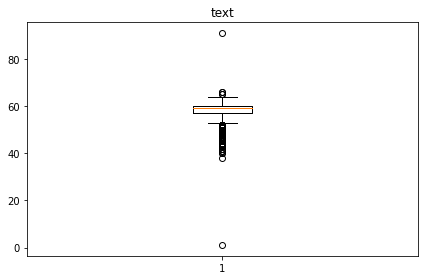

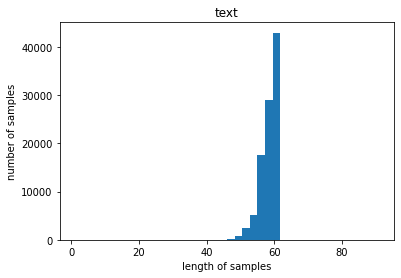

In [51]:
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))

plt.subplot()
plt.boxplot(text_len)
plt.title('text')
plt.tight_layout()
plt.show()

plt.title('text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

문장 최소 길이가 1인 이상치가 있으므로 확인

In [52]:
import pandas as pd

# 단어 개수가 1개인 이상치 데이터 찾기
outliers_text = data[data['text'].str.split().str.len() == 1]

# 테이블 형태로 출력
from IPython.display import display

display(outliers_text)


,headlines,text
52,headlines,text


불필요한 데이터 -> 삭제

In [57]:
data = data.drop(index=52).reset_index(drop=True)

In [58]:
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98359


In [59]:
# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다. 

clean_text = []

for text in data['text']:
    clean_text.append(preprocess_sentence(text, remove_stopwords=True))

# 전처리 후 출력
print("text 전처리 후 결과: ", clean_text[:5])

text 전처리 후 결과:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insur

In [60]:
# 전체 headlines 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다. 
clean_headlines = []

for headline in data['headlines']:
    clean_headlines.append(preprocess_sentence(headline, remove_stopwords=False))

print("headlines 전처리 후 결과: ", clean_headlines[:5])

headlines 전처리 후 결과:  ['upgrad learner switches to career in ml al with salary hike', 'delhi techie wins free food from swiggy for one year on cred', 'new zealand end rohit sharma led india match winning streak', 'aegon life iterm insurance plan helps customers save tax', 'have known hirani for yrs what if metoo claims are not true sonam']


데이터 전처리 후 null 확인

In [61]:
import numpy as np

data['text'] = clean_text
data['headlines'] = clean_headlines

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)

data.isnull().sum()

headlines    0
text         0
dtype: int64

#### train test split

샘플 최대 길이 정하기

텍스트의 최소 길이 : 18
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.10003151719721
요약의 최소 길이 : 3
요약의 최대 길이 : 16
요약의 평균 길이 : 9.299616710214622


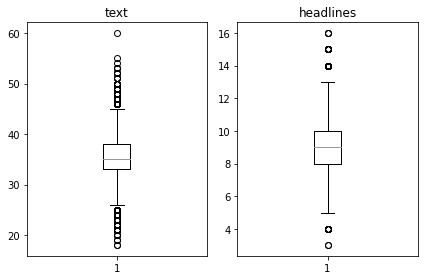

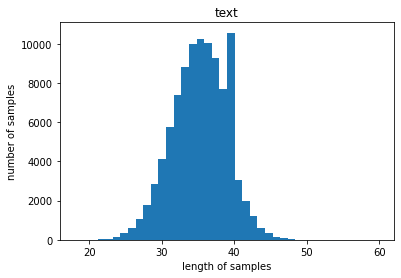

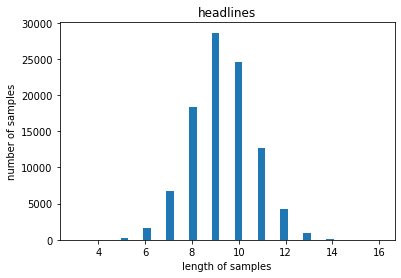

In [64]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
headlines_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(headlines_len)))
print('요약의 최대 길이 : {}'.format(np.max(headlines_len)))
print('요약의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('text')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('headlines')
plt.tight_layout()
plt.show()

plt.title('text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

데이터를 보면 text 와 headlines 모두 균일한 길이 분포를 보이고 이상치도 크게 없는 것 같다고 판단하여 max_len의 길이는 실제 최대 길이와 동일한 값으로 지정

In [65]:
text_max_len = 60
headline_max_len = 16

#### 헤드라인 (요약) 데이터에 시작 토큰과 종료 토큰 추가

In [67]:
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')
data.head()

,headlines,text,decoder_input,decoder_target
0,upgrad learner switches to career in ml al with salary hike,saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers,sostoken upgrad learner switches to career in ml al with salary hike,upgrad learner switches to career in ml al with salary hike eostoken
1,delhi techie wins free food from swiggy for one year on cred,kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit,sostoken delhi techie wins free food from swiggy for one year on cred,delhi techie wins free food from swiggy for one year on cred eostoken
2,new zealand end rohit sharma led india match winning streak,new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history,sostoken new zealand end rohit sharma led india match winning streak,new zealand end rohit sharma led india match winning streak eostoken
3,aegon life iterm insurance plan helps customers save tax,aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insure critical illnesses disability accidental death benefit rider life cover age years,sostoken aegon life iterm insurance plan helps customers save tax,aegon life iterm insurance plan helps customers save tax eostoken
4,have known hirani for yrs what if metoo claims are not true sonam,speaking sexual harassment allegations rajkumar hirani sonam kapoor said known hirani many years true metoo movement get derailed metoo movement always believe woman case need reserve judgment added hirani accused assistant worked sanju,sostoken have known hirani for yrs what if metoo claims are not true sonam,have known hirani for yrs what if metoo claims are not true sonam eostoken


인코더의 입력, 디코더의 입력과 레이블을 각각 다시 Numpy 타입으로 저장

In [69]:
encoder_input = np.array(data['text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블

데이터 순서 섞기

In [70]:
# 먼저 encoder_input과 크기와 형태가 같은 순서가 섞인 정수 시퀀스로 만들기

indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[37491 54927  8726 ... 29647 45674 15429]


In [71]:
# 이 정수 시퀀스를 이용해 다시 데이터의 샘플 순서 정의 -> 잘 섞인 샘플

encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

훈련 데이터, 테스트 데이터 분리

In [72]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 19671


In [73]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 78688
훈련 레이블의 개수 : 78688
테스트 데이터의 개수 : 19671
테스트 레이블의 개수 : 19671


#### 정수 인코딩

text 데이터에 대해서 먼저 수행

In [75]:
# keras의 토크나이저를 사용해 입력된 훈련 데이터로부터 단어 집합 만듦

from tensorflow.keras.preprocessing.text import Tokenizer 

src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

tar_tokenizer.word_counts.items() 에 저장된 단어 통계 확인

In [77]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 69750
등장 빈도가 6번 이하인 희귀 단어의 수: 47559
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 22191
단어 집합에서 희귀 단어의 비율: 68.18494623655914
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.4902966848138006


희귀 단어 등장 빈도 비율이 적으므로 무시해도 될 것이라 판단  
단어 집합을 22000으로 제한  
=> 추후 결과를 보고 단어 집합을 줄여서 실험해보면 좋을 것 같다

In [78]:
src_vocab = 22000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 22,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성

정수 인코딩

In [79]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[28, 2, 100, 174, 2347, 1121, 533, 7468, 957, 539, 2347, 56, 122, 558, 372, 1307, 1316, 957, 1893, 205, 1316, 1307, 539, 6008, 2347, 6, 2077, 205, 74, 6008, 410, 1833], [1192, 4969, 373, 770, 1328, 133, 4217, 799, 73, 28, 38, 21, 16, 16016, 8286, 1052, 15, 21, 31, 27, 752, 8421, 65, 770, 345, 77, 828, 6200, 834, 77, 2845, 1052, 5944, 358, 92, 27], [168, 61, 9, 1980, 526, 1044, 1581, 3394, 1879, 1449, 1203, 330, 2140, 19, 4970, 1449, 3802, 1449, 22, 1581, 3394, 2685, 22, 1581, 9691, 1581, 97, 19504, 1865, 22, 6, 10495, 19504]]


headlines 데이터에 대해서도 동일하게 수행

In [80]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [81]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 30206
등장 빈도가 5번 이하인 희귀 단어의 수: 19767
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 10439
단어 집합에서 희귀 단어의 비율: 65.44064093226511
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.651389517929403


In [82]:
tar_vocab = 10000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 1419, 1263, 650, 12, 119, 5, 676, 91, 942], [1, 40, 77, 18, 651, 6200, 4, 308, 1859, 6, 1240], [1, 25, 24, 3, 691, 741, 6, 1053, 301, 23, 21, 28, 2794], [1, 20, 1181, 115, 18, 44, 1377, 105, 47, 2843, 48, 7240], [1, 4018, 1054, 3, 2973, 4, 127, 102, 5, 5232, 1264, 183, 66]]
target
decoder  [[1419, 1263, 650, 12, 119, 5, 676, 91, 942, 2], [40, 77, 18, 651, 6200, 4, 308, 1859, 6, 1240, 2], [25, 24, 3, 691, 741, 6, 1053, 301, 23, 21, 28, 2794, 2], [20, 1181, 115, 18, 44, 1377, 105, 47, 2843, 48, 7240, 2], [4018, 1054, 3, 2973, 4, 127, 102, 5, 5232, 1264, 183, 66, 2]]


#### 패딩

패딩 전, 정수 인코딩 후 빈 샘플이 있는지 확인  
이때, sostoken과 eostoken으로 빈 샘플의 길이는 1

In [83]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 78688
훈련 레이블의 개수 : 78688
테스트 데이터의 개수 : 19671
테스트 레이블의 개수 : 19671


샘플들을 병렬 처리하기 위해 같은 길이로 맞춰줌

In [86]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=headline_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headline_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headline_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headline_max_len, padding='post')

### 3. 어텐션 메커니즘 사용 (추상적 요약)
일반적인 seq2seq보다는 어텐션 메커니즘을 사용한 seq2seq를 사용하는 것이 더 나은 성능을 얻을 수 있어요.   
실습 내용을 참고하여 어텐션 메커니즘을 사용한 seq2seq를 설계해 보세요.

#### 모델 설계하기

인코더 설계

In [88]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(enc_emb)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output3, state_h3, state_c3 = encoder_lstm3(enc_emb)

디코더 설계

In [89]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h3, state_c3])

어텐션

In [90]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_output3])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

In [91]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 60)]         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 60, 128)      2816000     input_2[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 128)    1280000     input_3[0][0]                    
______________________________________________________________________________________________

#### 모델 훈련하기

In [92]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
308/308 [==============================] - 58s 93ms/step - loss: 4.3147 - val_loss: 4.0137
Epoch 2/50
308/308 [==============================] - 29s 94ms/step - loss: 3.8811 - val_loss: 3.6960
Epoch 3/50
308/308 [==============================] - 30s 97ms/step - loss: 3.5877 - val_loss: 3.4641
Epoch 4/50
308/308 [==============================] - 30s 97ms/step - loss: 3.3716 - val_loss: 3.3188
Epoch 5/50
308/308 [==============================] - 30s 97ms/step - loss: 3.2102 - val_loss: 3.2057
Epoch 6/50
308/308 [==============================] - 30s 99ms/step - loss: 3.0756 - val_loss: 3.1229
Epoch 7/50
308/308 [==============================] - 30s 98ms/step - loss: 2.9611 - val_loss: 3.0462
Epoch 8/50
308/308 [==============================] - 31s 100ms/step - loss: 2.8618 - val_loss: 2.9897
Epoch 9/50
308/308 [==============================] - 31s 100ms/step - loss: 2.7717 - val_loss: 2.9407
Epoch 10/50
308/308 [==============================] - 31s 100ms/step - loss: 2.

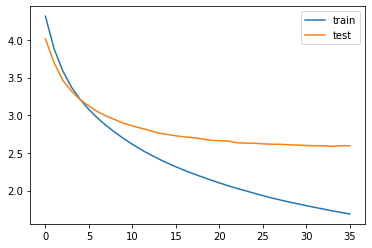

In [94]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#### 인퍼런스 모델 구현

In [95]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [96]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_output3, state_h3, state_c3])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [97]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

인퍼런스 단계에서 단어 시퀀스를 완성하는 함수

In [101]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headline_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

### 4. 실제 결과와 요약문 비교 (추상적 요약)
원래의 요약문(headlines 열)과 학습을 통해 얻은 추상적 요약의 결과를 비교해 보세요.

#### 모델 테스트

In [102]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if (i != 0 and i != tar_word_to_index['sostoken'] and i != tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i]+' '
    return temp

In [103]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : madhya pradesh congress removed three toilets party headquarters part attempt remove premises party power state years feels bring good luck improve chances winning state assembly elections due year 
실제 요약 : mp congress removes from party headquarters 
예측 요약 :  mp cong mp booked for mp mayor on its name


원문 : bjp president amit shah tuesday said late pm rajiv gandhi signed assam accord similar national register citizens adding courage implement statement came debate rajya sabha wherein opposition leaders criticised government exclusion lakh people nrc final draft 
실제 요약 : rajiv govt had no courage for something like assam nrc shah 
예측 요약 :  amit shah calls for amit shah


원문 : following australian cricket team win first india australia coach justin langer said australian team enough getting enough getting beaten enough getting loved brave boys coach said team 
실제 요약 : we have had enough of getting up australian coach 
예측 요약 :  aus coach not to aus coach aus coach


원문 : year old m

### 5. Summa을 이용한 추출적 요약

In [ ]:
from summa.summarizer import summarize

for i in range(20):
    print("실제 요약 : ", data['headlines'][i])
    print("추출 요약 : ", summarize(data['text'][i], ratio=0.5))
    print("\n")